### Prelude
Loading our database and checking what's inside

In [3]:
frame <- read.csv("./data/Salary_Data.csv")
str(frame)

'data.frame':	6704 obs. of  6 variables:
 $ Age                : int  32 28 45 36 52 29 42 31 26 38 ...
 $ Gender             : chr  "Male" "Female" "Male" "Female" ...
 $ Education.Level    : chr  "Bachelor's" "Master's" "PhD" "Bachelor's" ...
 $ Job.Title          : chr  "Software Engineer" "Data Analyst" "Senior Manager" "Sales Associate" ...
 $ Years.of.Experience: num  5 3 15 7 20 2 12 4 1 10 ...
 $ Salary             : int  90000 65000 150000 60000 200000 55000 120000 80000 45000 110000 ...


### Overview
I wanna see an overview of our database. <br>
I want to see an "average" employee. <br>

Hence, my overview table should contain the following params
1. Average Age
2. Common Gender
3. Common Education
4. Common Job
5. Average Years of Experience
6. Average Salary

In [69]:
most.popular <- function(values) {
  unique.values <- unique(values)
  with.count <- sapply(unique.values, function(value) length(which(values == value)))
  names(with.count) <- unique.values
  max.count <- max(with.count)
  popular <- with.count[with.count == max.count]
  return(names(popular))
}

In [101]:
average <- function(values, digits = 0) {
  complete <- values[complete.cases(values)]
  average <- mean(complete)
  if (!is.null(digits)) {
    average <- round(average, digits = digits)
  }
  return(average)
}

In [112]:
overview <- c(
  average(frame$Age),
  most.popular(frame$Gender),
  most.popular(frame$Education.Level),
  most.popular(frame$Job.Title),
  average(frame$Years.of.Experience),
  average(frame$Salary)
)
overview <- data.frame(overview)
rownames(overview) <- c("Average Age", "Popular Gender", "Popular Education", "Popular Job", "Mean Experience", "Mean Salary")
overview

,overview
,<chr>
Average Age,34
Popular Gender,Male
Popular Education,Bachelor's Degree
Popular Job,Software Engineer
Mean Experience,8
Mean Salary,115327


In [116]:
library(gridExtra)
library(ggplot2)
overview.table <- tableGrob(overview)
ggsave("./output/overview.png", overview.table, width = 4, height = 4)

### Distribution over Gender
Let's build a piechart that will should the fractions of men and women in the database

In [23]:
percents.of <- function(values) {
  total <- sum(values)
  frac <- values / total * 100
  output <- sapply(frac, function(value) {
    rounded <- round(value, digits = 2)
    return(paste0(rounded, "%"))
  })
  return(output)
}

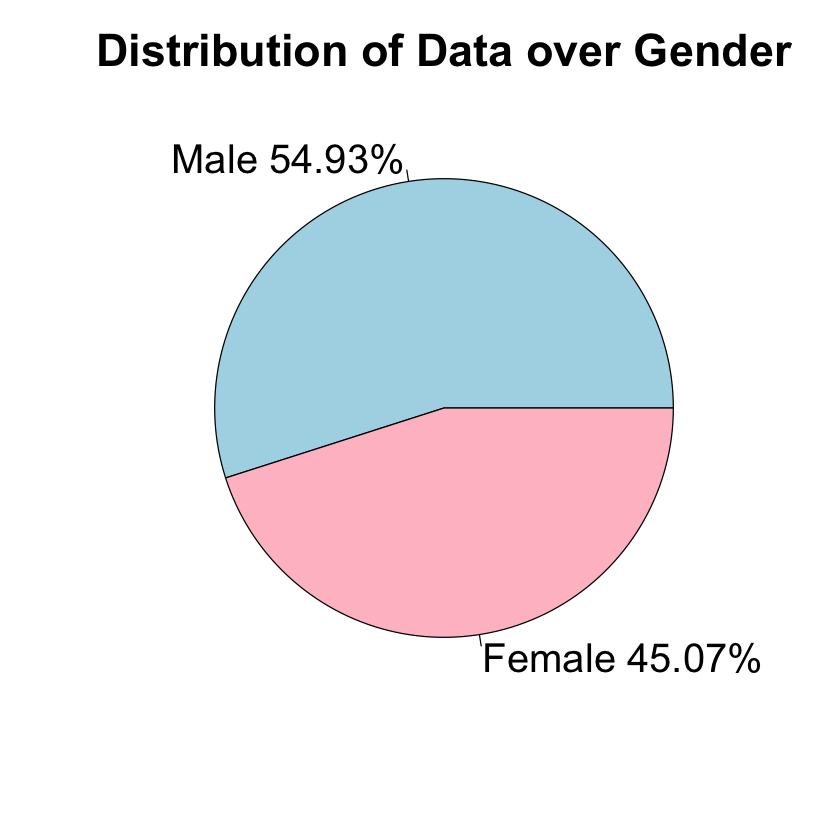

In [33]:
genders <- frame$Gender
female.amount <- length(which(genders == "Female"))
male.amount <- length(which(genders == "Male" ))

values <- c(male.amount, female.amount)
percents <- percents.of(values)
labels <- paste(c("Male", "Female"), percents)

par(bg = "White")
pie(
  values, labels = labels,
  cex = 2, col = c("lightblue", "pink"),
  main = "Distribution of Data over Gender",
  cex.main = 2.25
)

### Gender Comparison
Let's compare different parameters over gender. <br>
I'm primarily interested in salaries, jobs, education level

In [132]:
male.data <- frame[frame$Gender == "Male", ]
female.data <- frame[frame$Gender == "Female", ]

[1] 13501

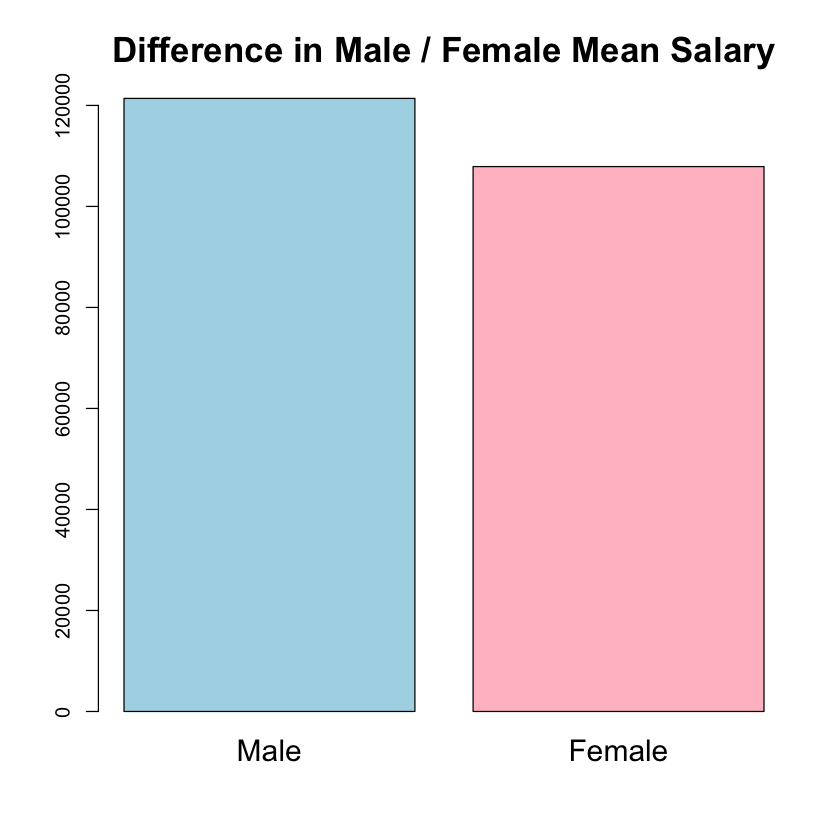

In [133]:
male.salary <- average(male.data$Salary)
female.salary <- average(female.data$Salary)

par(bg = "white")
barplot(
  c(male.salary, female.salary), 
  names.arg = c("Male", "Female"), cex.names = 1.5,
  col = c("lightblue", "pink"),
  main = "Difference in Male / Female Mean Salary",
  cex.main = 1.75
)

difference <- male.salary - female.salary
difference

In [152]:
jobs <- unique(frame$Job.Title)

differences <- sapply(jobs, function(job) {
  male.count <- length(which(male.data$Job.Title == job))
  female.count <- length(which(female.data$Job.Title == job))
  return(male.count - female.count)
})
names(differences) <- NULL

difference.stats <- data.frame(Job = jobs, Difference = differences)

male.dominated <- difference.stats[difference.stats$Difference > 0, ]
female.dominated <- difference.stats[difference.stats$Difference < 0, ]

get.top.different <- function(frame) {
  ordered <- frame[order(abs(frame$Difference), decreasing = TRUE), ]
  top <- ordered[1:10, ]
  return(top)
}

top.male.dominated <- get.top.different(male.dominated)
top.female.dominated <- get.top.different(female.dominated)

In [154]:
top.female.dominated

,Job,Difference
,<chr>,<int>
9,Marketing Coordinator,-156
17,Marketing Manager,-107
186,Human Resources Manager,-104
25,Financial Manager,-72
190,Receptionist,-57
83,Junior Software Developer,-54
184,Human Resources Coordinator,-49
82,Research Scientist,-33
4,Sales Associate,-26


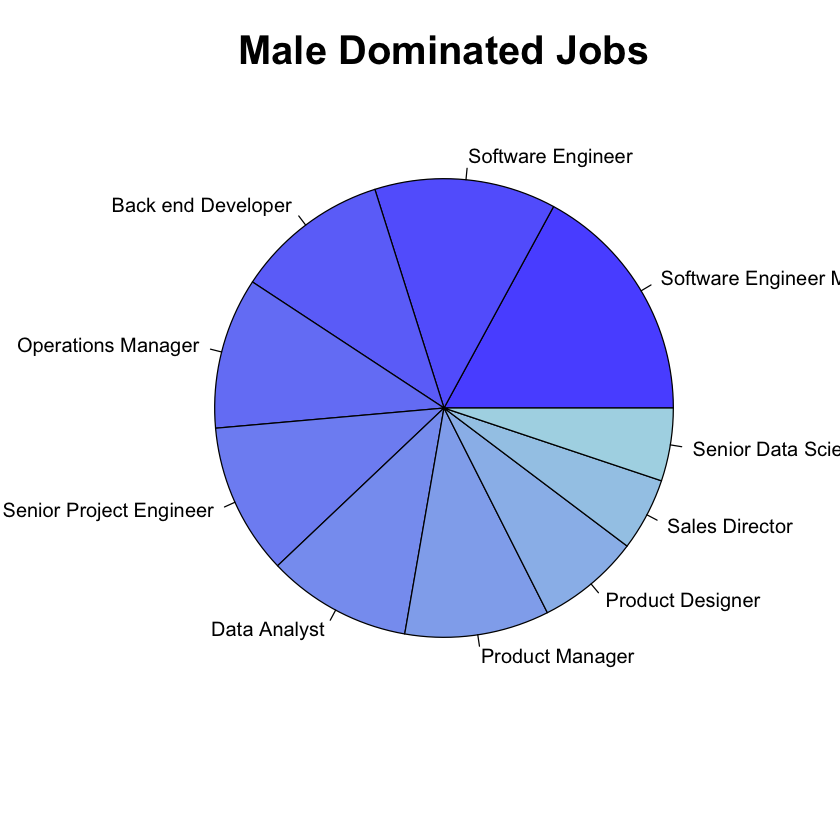

In [164]:
par(bg = "white")
male.palette <- colorRampPalette(c("#5b5bff", "lightblue"))
male.colors <- male.palette(nrow(top.male.dominated))
pie(
  top.male.dominated$Difference, 
  labels = top.male.dominated$Job,
  col = male.colors,
  main = "Male Dominated Jobs",
  cex.main = 2
)

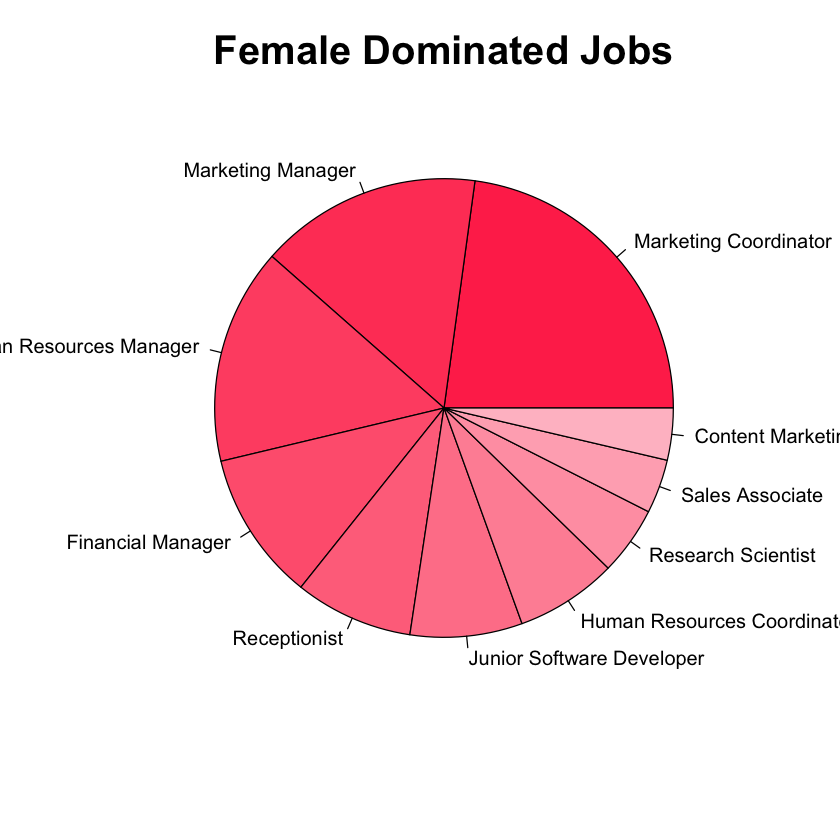

In [167]:
par(bg = "white")
female.palette <- colorRampPalette(c("#ff3759", "pink"))
female.colors <- female.palette(nrow(top.female.dominated))
pie(
  abs(top.female.dominated$Difference), 
  labels = top.female.dominated$Job,
  col = female.colors,
  main = "Female Dominated Jobs",
  cex.main = 2
)